# **Diabetes Detection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Statistic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Đọc dữ liệu
data = pd.read_csv("/content/drive/MyDrive/Hoc May Thong Ke/DS102_TH/Do An LT/diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Các thông tin cơ bản của dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Thống kê và mô tả dữ liệu
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<ipython-input-7-3fafd24399ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr(), annot=True)


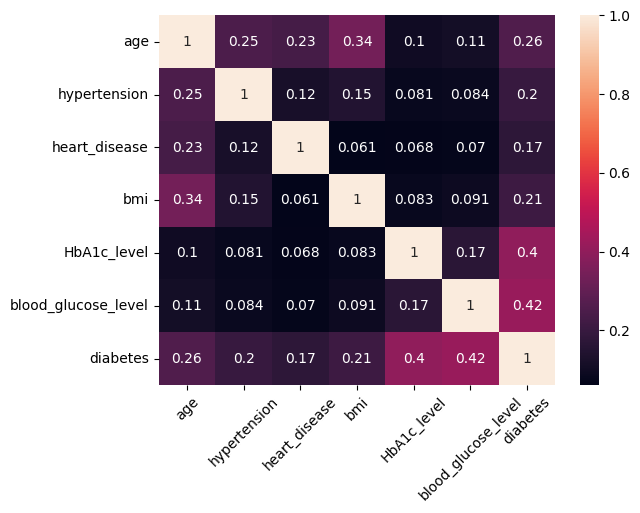

In [ ]:
# correlation matrix
sn.heatmap(data.corr(), annot=True)
plt.xticks(rotation=45)
plt.show();

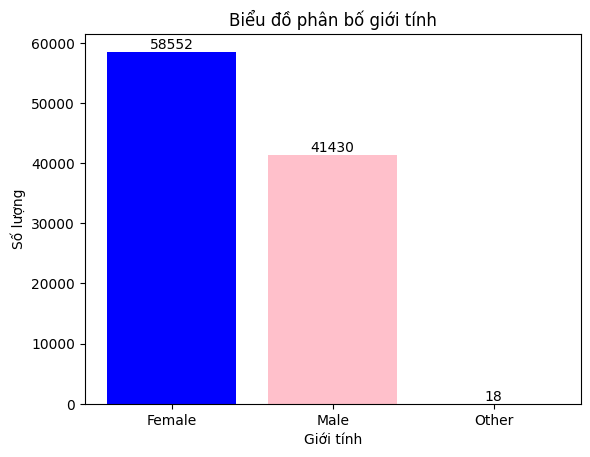

In [ ]:
genders = data["gender"].value_counts()
point = genders.index
frequency = genders.values
bars = plt.bar(point, frequency, color=['blue', 'pink', 'red'])
for bar, value in zip(bars, frequency):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
             ha='center', va='bottom')
plt.title('Biểu đồ phân bố giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.show()

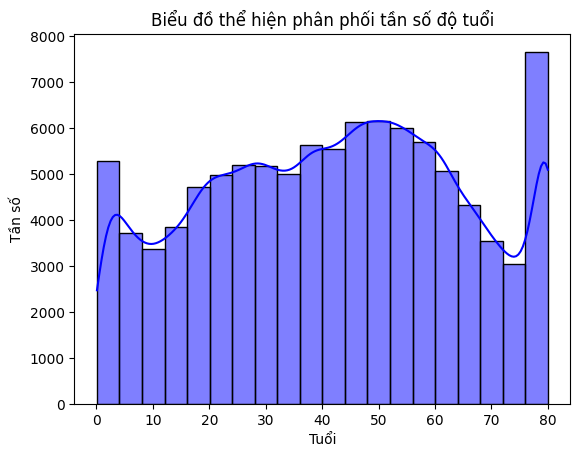

In [ ]:
sn.histplot(data["age"], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Biểu đồ thể hiện phân phối tần số độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tần số')
plt.show()

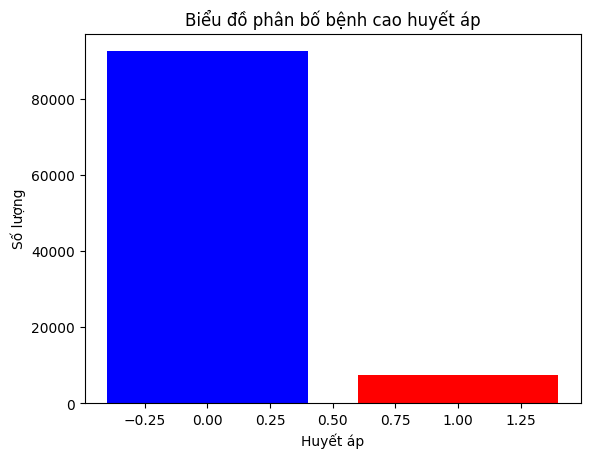

In [ ]:
hypertension = data["hypertension"].value_counts()
point = hypertension.index
frequency = hypertension.values
plt.bar(point,frequency, color=['blue', 'red'])
plt.title('Biểu đồ phân bố bệnh cao huyết áp')
plt.xlabel('Huyết áp')
plt.ylabel('Số lượng')
plt.show()

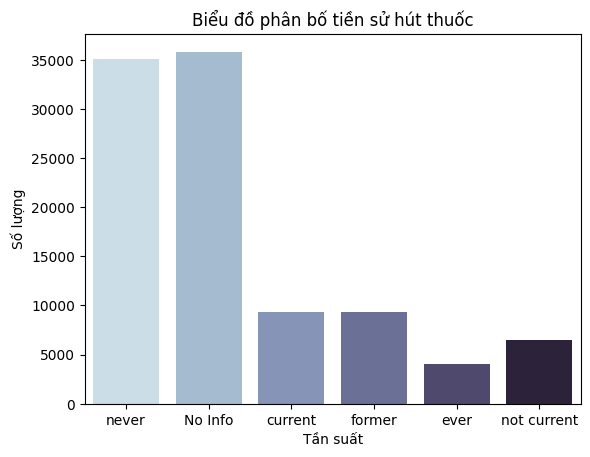

In [ ]:
sn.countplot(x="smoking_history", data=data, palette='ch:s=.25,rot=-.25')
plt.title('Biểu đồ phân bố tiền sử hút thuốc')
plt.xlabel('Tần suất')
plt.ylabel('Số lượng')
plt.show()

Text(0.5, 1.0, 'Biểu độ tỷ lệ tiểu đường của các bệnh nhân')

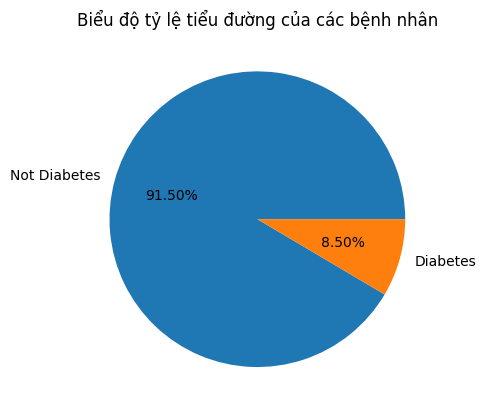

In [ ]:
diabetes_counts = data["diabetes"].value_counts()
plt.pie(diabetes_counts, labels=["Not Diabetes", "Diabetes"], autopct='%.2f%%')
plt.title(f'Biểu độ tỷ lệ tiểu đường của các bệnh nhân')

## Data preprocessing

In [ ]:
data.shape

(100000, 9)

In [ ]:
duplicate_rows = data[data.duplicated()]
print("Số hàng bị trùng lặp: ", duplicate_rows.shape[0])
data = data.drop_duplicates()

Số hàng bị trùng lặp:  3854


In [ ]:
data.shape

(96146, 9)

In [ ]:
# Loại bỏ sample thuộc giá trị thiểu số
data = data[data["gender"] != "Other"]

In [ ]:
# Xác định feature và target
target = "diabetes"
y = data[target]
x = data.drop(target, axis="columns")

In [ ]:
# Xác định các loại dữ liệu của các feature
numeric_features = ["age", "blood_glucose_level", "bmi", "HbA1c_level"]
nominal_features = ["smoking_history"]
binary_nominal_features = ["gender", "hypertension", "heart_disease"]

In [ ]:
# Chia dữ liệu
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

### Xử lý các binary nominal features

In [ ]:
x_train["gender"].head(10)

12312    Female
51981    Female
62671      Male
33823      Male
44586    Female
66016    Female
33826      Male
38877    Female
63668    Female
32199    Female
Name: gender, dtype: object

In [ ]:
le = LabelEncoder()
for feature in binary_nominal_features:
  x_train[feature] = le.fit_transform(x_train[feature])
  x_test[feature] = le.transform(x_test[feature])

x_train["gender"].head(10)

12312    0
51981    0
62671    1
33823    1
44586    0
66016    0
33826    1
38877    0
63668    0
32199    0
Name: gender, dtype: int64

### Xử lý các nominal features

In [ ]:
x_train.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
12312,0,22.0,0,0,never,24.12,6.1,100
51981,0,69.0,0,1,not current,28.45,9.0,260
62671,1,31.0,0,0,never,20.67,6.6,200
33823,1,59.0,0,0,never,27.16,8.2,160
44586,0,24.0,0,0,never,22.65,6.2,140
66016,0,4.0,0,0,No Info,15.60,4.5,126
33826,1,68.0,1,0,former,31.38,6.0,126
38877,0,26.0,0,0,former,31.61,6.0,126
63668,0,26.0,0,0,No Info,21.46,6.5,85
32199,0,5.0,0,0,No Info,17.75,4.5,159


In [ ]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
ohe = OneHotEncoder()
for feature in nominal_features:
    ohe_train = ohe.fit_transform(x_train[feature].values.reshape(-1, 1)).toarray()
    ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out([feature]))
    x_train = pd.concat([x_train, ohe_train], axis=1)
    x_train = x_train.drop(feature, axis=1)

    ohe_test = ohe.transform(x_test[feature].values.reshape(-1, 1)).toarray()
    ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out([feature]))
    x_test = pd.concat([x_test, ohe_test], axis=1)
    x_test = x_test.drop(feature, axis=1)

x_train.head(10)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,22.0,0,0,24.12,6.1,100,0.0,0.0,0.0,0.0,1.0,0.0
1,0,69.0,0,1,28.45,9.0,260,0.0,0.0,0.0,0.0,0.0,1.0
2,1,31.0,0,0,20.67,6.6,200,0.0,0.0,0.0,0.0,1.0,0.0
3,1,59.0,0,0,27.16,8.2,160,0.0,0.0,0.0,0.0,1.0,0.0
4,0,24.0,0,0,22.65,6.2,140,0.0,0.0,0.0,0.0,1.0,0.0
5,0,4.0,0,0,15.60,4.5,126,1.0,0.0,0.0,0.0,0.0,0.0
6,1,68.0,1,0,31.38,6.0,126,0.0,0.0,0.0,1.0,0.0,0.0
7,0,26.0,0,0,31.61,6.0,126,0.0,0.0,0.0,1.0,0.0,0.0
8,0,26.0,0,0,21.46,6.5,85,1.0,0.0,0.0,0.0,0.0,0.0
9,0,5.0,0,0,17.75,4.5,159,1.0,0.0,0.0,0.0,0.0,0.0


## Model Building

### Find the best model with GridSearchCV

In [ ]:
# Tìm mô hình tốt
def Find_Best_Model(X, Y):
  parameters = {
      'KNN': {
          'model': KNeighborsClassifier(),
          'param_grid': {
              'n_neighbors': [3, 5],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'brute']
          }
      },
      'RandomForestClassifier': {
          'model': RandomForestClassifier(random_state=42),
          'param_grid': {
              'n_estimators': [50, 100],
              'criterion': ["gini", "entropy"],
              'max_depth': [None, 20]
          }
      },
      'LogisticRegression': {
          'model': LogisticRegression(random_state=42, max_iter=5000),
          'param_grid': {
              'C': [0.1, 1],
              'solver': ['lbfgs', 'liblinear']
          }
      }
  }

  results = []
  for model_name, config in parameters.items():
      model = config["model"]
      param_grid = config["param_grid"]

      grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1")
      grid_search.fit(X, Y)

      best_params = grid_search.best_params_
      best_score = grid_search.best_score_
      results.append({'Model': model_name, 'Best Parameters': best_params, 'Best Score': best_score})

  return pd.DataFrame(results)


In [ ]:
Find_Best_Model(x_train, y_train)

,Model,Best Parameters,Best Score
0,KNN,"{'algorithm': 'brute', 'n_neighbors': 5, 'weig...",0.664680
1,RandomForestClassifier,"{'criterion': 'entropy', 'max_depth': 20, 'n_e...",0.800852
2,LogisticRegression,"{'C': 1, 'solver': 'lbfgs'}",0.730316


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Find model with Standard Scaler

In [ ]:
scaled_x_train, scaled_x_test = x_train.copy(), x_test.copy()

scaler = StandardScaler()
scaled_x_train[numeric_features] = scaler.fit_transform(scaled_x_train[numeric_features])
scaled_x_test[numeric_features] = scaler.transform(scaled_x_test[numeric_features])

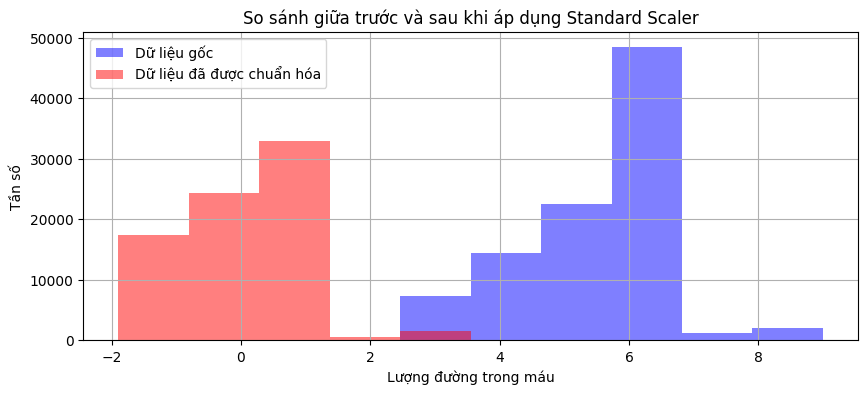

In [ ]:
unscaled_data = pd.DataFrame(data)['HbA1c_level']
scaled_data = scaled_x_train['HbA1c_level']

min_val = min(unscaled_data.min(), scaled_data.min())
max_val = max(unscaled_data.max(), scaled_data.max())

plt.figure(figsize=(10, 4))

plt.hist(unscaled_data, bins=10, range=(min_val, max_val), color='blue', alpha=0.5, label='Dữ liệu gốc')
plt.hist(scaled_data, bins=10, range=(min_val, max_val), color='red', alpha=0.5, label='Dữ liệu đã được chuẩn hóa')

plt.title('So sánh giữa trước và sau khi áp dụng Standard Scaler')
plt.xlabel('Lượng đường trong máu')
plt.ylabel('Tần số')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Find_Best_Model(scaled_x_train, y_train)

,Model,Best Parameters,Best Score
0,KNN,"{'algorithm': 'brute', 'n_neighbors': 5, 'weig...",0.728954
1,RandomForestClassifier,"{'criterion': 'entropy', 'max_depth': 20, 'n_e...",0.800714
2,LogisticRegression,"{'C': 1, 'solver': 'lbfgs'}",0.730136


***Việc dùng scaler trong bài toán có vẻ không có thay đổi nhiều***

Find model with Remove ouliers with z-scores

In [ ]:
x_train_no_outliers, y_train_no_outliers = x_train.copy(), y_train.copy()

def remove_outliers_z_score(x, y, numeric_features, threshold=4):
    combined_data = pd.concat([x[numeric_features], y], axis=1)
    z_scores = np.abs((x[numeric_features] - x[numeric_features].mean()) / x[numeric_features].std())
    x_no_outliers = x[(z_scores < threshold).all(axis=1)]
    y_no_outliers = y.iloc[x_no_outliers.index]
    return x_no_outliers, y_no_outliers
x_train_no_outliers, y_train_no_outliers = remove_outliers_z_score(x_train, y_train, numeric_features)

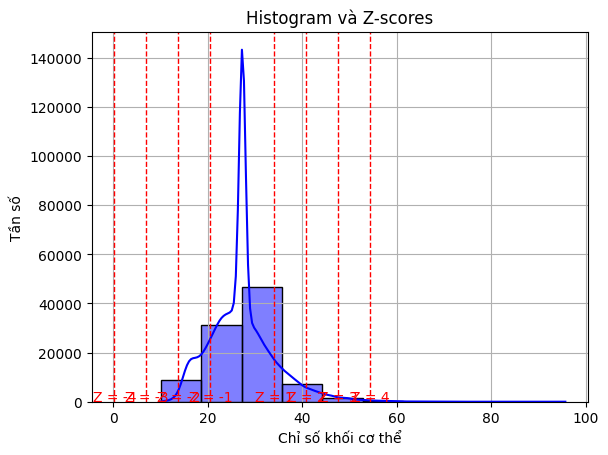

In [ ]:
draw_feature = "bmi"
sn.histplot(data[draw_feature], bins=10, kde=True, color='blue', edgecolor='black')

mean_value = data[draw_feature].mean()
std_value = data[draw_feature].std()
z_scores = [-4, -3, -2, -1, 1, 2, 3, 4]
for z in z_scores:
    z_value = mean_value + z * std_value
    plt.axvline(z_value, linestyle='dashed', linewidth=1, color='red')
    plt.text(z_value, 100, f'Z = {z}', color='red', ha='center')

plt.xlabel('Chỉ số khối cơ thể')
plt.ylabel('Tần số')
plt.title('Histogram và Z-scores')
plt.grid(True)
plt.show()

In [ ]:
Find_Best_Model(x_train_no_outliers, y_train_no_outliers)

,Model,Best Parameters,Best Score
0,KNN,"{'algorithm': 'brute', 'n_neighbors': 5, 'weig...",0.664767
1,RandomForestClassifier,"{'criterion': 'entropy', 'max_depth': 20, 'n_e...",0.800621
2,LogisticRegression,"{'C': 1, 'solver': 'lbfgs'}",0.728617


***Có vẻ việc remove các outlier trong bài toán vô tình làm mất đi các dữ liệu quan trọng nên mang lại kết quả không tốt hơn được***

**Vậy mô hình RandomForestClassifier với param criterion: entropy,  max_depth: 20, n_estimators: 100 có f1-score lớn nhất (0.8008516827534301)**


### Training

In [ ]:
clf = RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=20, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=50,
                       random_state=42)

## Model Evaluation

              precision    recall  f1-score   support

Not Diabetes       0.97      1.00      0.98     17530
    Diabetes       0.96      0.69      0.81      1696

    accuracy                           0.97     19226
   macro avg       0.97      0.84      0.89     19226
weighted avg       0.97      0.97      0.97     19226



Text(0.5, 1.0, 'Confusion Matrix')

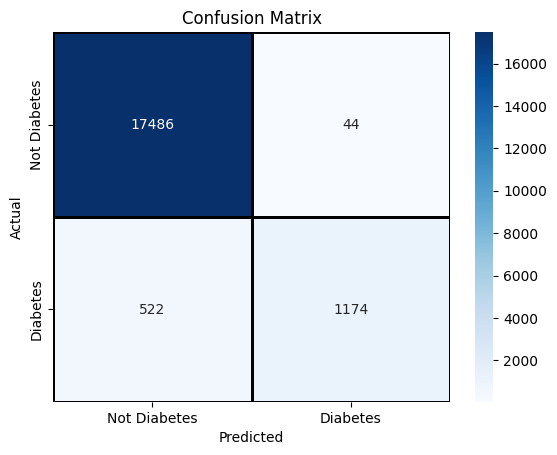

In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["Not Diabetes", "Diabetes"]))

cm = confusion_matrix(y_test, y_pred)
confusion = pd.DataFrame(cm, index=["Not Diabetes", "Diabetes"], columns=["Not Diabetes", "Diabetes"])
sn.heatmap(confusion, annot=True, cmap='Blues', linecolor='black', linewidths=1, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [ ]:
# Một số kết quả dự đoán trên tập test
for actual, predict in zip(y_test[:50], y_pred[:50]):
  print(f"Actual: {actual}, Predicted: {predict}")

Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predi

In [ ]:
# Mức độ quan trọng của các features
feature_importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
5,HbA1c_level,0.389086
6,blood_glucose_level,0.327121
1,age,0.121882
4,bmi,0.102836
2,hypertension,0.019418
3,heart_disease,0.011275
0,gender,0.006874
7,smoking_history_No Info,0.006287
10,smoking_history_former,0.004162
11,smoking_history_never,0.003519


              precision    recall  f1-score   support

Not Diabetes       0.97      1.00      0.98     17530
    Diabetes       0.95      0.71      0.81      1696

    accuracy                           0.97     19226
   macro avg       0.96      0.85      0.90     19226
weighted avg       0.97      0.97      0.97     19226



Text(0.5, 1.0, 'Confusion Matrix')

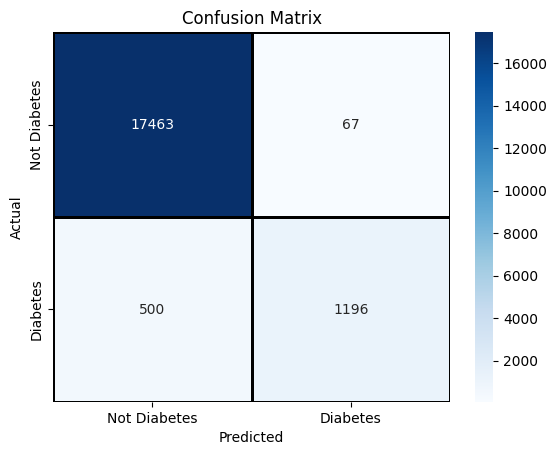

In [ ]:
# Thử bỏ đi 1 vài feature
feature_not_importances = feature_importances["Feature"].loc[(feature_importances['Importance'] < 0.01)]
x_thu = x_train.drop(feature_not_importances, axis="columns")
x_test_thu = x_test.drop(feature_not_importances, axis="columns")

clf_thu = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=20)
clf_thu.fit(x_thu, y_train)

y_pred = clf_thu.predict(x_test_thu)
print(classification_report(y_test, y_pred, target_names=["Not Diabetes", "Diabetes"]))

cm = confusion_matrix(y_test, y_pred)
confusion = pd.DataFrame(cm, index=["Not Diabetes", "Diabetes"], columns=["Not Diabetes", "Diabetes"])
sn.heatmap(confusion, annot=True, cmap='Blues', linecolor='black', linewidths=1, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Tổng hợp thành 1 Pipeline và lưu trữ model

In [ ]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv("/content/drive/MyDrive/Hoc May Thong Ke/DS102_TH/Do An LT/diabetes_prediction_dataset.csv")
data = data.drop_duplicates()
data = data[data["gender"] != "Other"]

target = "diabetes"
y = data[target]
x = data.drop(target, axis="columns")

numeric_features = ["age", "blood_glucose_level", "bmi", "HbA1c_level"]
nominal_features = ["smoking_history"]
binary_nominal_features = ["gender", "hypertension", "heart_disease"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ("bin_nom_features_encoder", OrdinalEncoder(), binary_nominal_features),
    ("nom_features_encoder", OneHotEncoder(), nominal_features)
])

classifier = RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=20, random_state=42)
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", classifier),
])

pipeline.fit(x_train, y_train)

model_path = "/content/drive/MyDrive/Hoc May Thong Ke/DS102_TH/Do An LT/model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(pipeline, file)